In [82]:
# ignore - use Oren's join

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_xpt_files(folder_path):
    """Input folder path to read multiple xpt files in folder
       Returns dictionary with key: file name, 
                               value: df"""
    df_dict = {}
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_sas(file_path, format='xport')
        name = os.path.splitext(file_name)[0]
        df_dict[name] = df
    return df_dict



def full_outer_join(dataframes):
    joined_df = None
    for df in dataframes.values():
        if joined_df is None:
            joined_df = df
        else:
            joined_df = pd.merge(joined_df, df, on='SEQN', how='outer')
    return joined_df


folder_path = '/users/leej136/Downloads/210/'
dataframes_dict = read_xpt_files(folder_path)
joined_dataframe = full_outer_join(dataframes_dict)
joined_dataframe

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,RHQ010,RHD018_x,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHD167,RHQ171,RHQ172,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ305,RHQ332,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ570,FSDHH,FSDAD,FSD151,FSQ165,FSQ012,FSD230,FSD162,FSQ760,FSQ653,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD652ZW,FSD672ZW,FSD652CW,FSD660ZW,INDFMMPI,INDFMMPC,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,RHD018_y,MCQ160A,MCQ195,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160P,MCQ160L,MCQ170L,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,HSQ590,ECD010,ECQ020,ECD070A,ECD070B,ECQ080,ECQ090,WHQ030E,MCQ080E,ECQ150,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,HUQ010,HUQ030,HUQ051,HUD062,HUQ071,HUQ090
0,109263.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.26,3.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,2.0,7.0,6.000000e+00,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.000000e+00,NaN,2.0,NaN
1,109264.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN,12.0,155.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.29,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2.0,6.0,5.397605e-79,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.397605e-79,2.0,2.0,1.0
2,109265.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,35.0,1.0,99.0,NaN,NaN,NaN,NaN,2.04,3.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999.0,9.0,6.0,4.000000e+00,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.000000e+00,NaN,2.0,NaN
3,109266.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN,13.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.0,2.0,NaN,NaN,NaN,NaN,2.0,2.0,1.0,9.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,60.0,1.0,4.0,30.0,480.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

*TTD - individual evaluation of each file is needed*

Found file P_RXQ_RX.XPT (prescription medication) has multiple lines for responder IDs in instances where the responder is taking more than one medication. Each medication ends up with a separate line. 

Evaluated files:
P_RXQ_RX.XPT (Prescription Medicine)
P_DPQ.XPT (Mental Health)



In [ ]:
"""Import Prescription Medicines file and decode disease indication columns from bytes to strings
Create new binary indicator column MDD with 1 if responder has MDD in any of the three columns, 0 for all else"""

prescript_med = pd.read_sas("/users/leej136/Downloads/210/P_RXQ_RX.XPT", format='xport')
ment_health = pd.read_sas("/users/leej136/Downloads/210/P_DPQ.XPT", format='xport')

prescript_med['RXDRSD1']=prescript_med['RXDRSD1'].apply(lambda x: x.decode())
prescript_med['RXDRSD2']=prescript_med['RXDRSD2'].apply(lambda x: x.decode())
prescript_med['RXDRSD3']=prescript_med['RXDRSD3'].apply(lambda x: x.decode())

conditions = [
    (prescript_med["RXDRSD1"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD1"] == "Major depressive disorder, recurrent, unspecified"),
    (prescript_med["RXDRSD2"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD2"] == "Major depressive disorder, recurrent, unspecified"),
    (prescript_med["RXDRSD3"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD3"] == "Major depressive disorder, recurrent, unspecified")
    ]

values = [1,1,1,1,1,1]
prescript_med['MDD'] = np.select(conditions, values)


# Sort by SEQN and MDD for any instances where the responder has MDD == 1, it will precede any rows where MDD == 0
# Only keep first row of each responder to retain rows where MDD == 1 if possible and MDD == 0 where not
prescript_med.sort_values(by=["SEQN"], axis = 0, ascending =[True], inplace=True)
prescript_med.sort_values(by=["MDD"], axis = 0, ascending =[False], inplace=True)
pm_dropped = prescript_med.drop_duplicates(subset = ['SEQN'], keep = 'first', inplace = False) 

df = pd.merge(prescript_med, pm_dropped, on='SEQN', how='inner')

df

In [ ]:
prescript_med = pd.read_sas("/users/leej136/Downloads/210/P_RXQ_RX.XPT", format='xport')
prescript_med['RXDRSD1']=prescript_med['RXDRSD1'].apply(lambda x: x.decode())
prescript_med['RXDRSC1']=prescript_med['RXDRSC1'].apply(lambda x: x.decode())

prescript_med['RXDRSC1'].value_counts()

f33=prescript_med[prescript_med['RXDRSC1'].str.contains("F33")]
f33['RXDRSC1'].value_counts()

In [ ]:
pm_dropped['MDD'].value_counts()

# Week 6 EDA

In [131]:
pd.set_option('display.max_columns', 500)
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
df_clean

,X,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170,RHQ010,RHD018_x,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHD167,RHQ171,RHQ172,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ305,RHQ332,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ570,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,OCD150,OCQ180,OCQ210,OCQ670,OCD383,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDYRUSZ,DMDEDUC2,DMDMARTZ,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690K,SMQ863,SMQ690F,SMQ830,SMDANY,SMAQUEX,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,DBQ930,DBQ935,DBQ940,DBQ945,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032H,HIQ032I,HIQ032J,HIQ260,HIQ105,HIQ270,HIQ210,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,PAQ706,FSDHH,FSDAD,FSD151,FSQ165,FSQ012,FSD230,FSD162,FSQ760,FSQ653,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD652ZW,FSD672ZW,FSD652CW,FSD660ZW,HUQ010,HUQ030,HUQ051,HUD062,HUQ071,HUQ090,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,INDFMMPI,INDFMMPC,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,RHD018_y,MCQ160A,MCQ195,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160P,MCQ160L,MCQ170L,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2,MDD,little_interest_in_doing_things,feeling_down_depressed_hopeless,trouble_falling_or_staying_asleep,feeling_tired_or_having_little_energy,poor_appetitie_or_overeating,feeling_bad_about_yourself,trouble_concentrating,moving_or_speaking_to_slowly_or_fast,thoughts_you_would_be_better_off_dead,difficult_doing_daytoday_tasks,alcoholic_drinks_past_12mo,how_healthy_is_your_diet,has_diabetes,count_days_seen_doctor_12mo,has_overweight_diagnosis,count_days_moderate_recreational_activity,count_minutes_moderate_recreational_activity,count_minutes_moderate_sedentary_activity,count_days_physical_activity_youth,has_tried_to_lose_weight_12mo,has_ate_less_to_lose_weight,has_exercised_to_lose_weight,count_lost_10plus_pounds,count_tried_to_lose_weight_youth,has_been_pregnant,food_security_level_household,food_security_level_adult,has_health_insurance,has_health_insurance_gap,general_health_condition,duration_last_healthcare_visit,monthly_poverty_index,monthly_poverty_index_category,count_hours_worked_last_w

In [132]:
df_clean['DPQ020'].value_counts()

5.397605e-79    6187
1.000000e+00    1456
2.000000e+00     387
3.000000e+00     269
9.000000e+00       5
7.000000e+00       2
Name: DPQ020, dtype: int64

In [133]:
# filter only for pregnant women
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]

df=preg

mental_health_feat = ['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090','DPQ100']
reproductive_feat = ['RHQ010','RHQ020','RHQ031','RHD043','RHQ060','RHQ070','RHQ074','RHQ076','RHQ078',
                     'RHQ131','RHD143','RHQ160','RHQ162','RHD167','RHQ171','RHQ172','RHD190','RHQ197',
                     'RHQ200','RHD280','RHQ305','RHQ332','RHQ540','RHQ542A','RHQ542B','RHQ542C','RHQ542D',
                     'RHQ554','RHQ570']
output_var = ['MDD']
df = df[mental_health_feat + reproductive_feat+ output_var]



def convert_to_int(df):
    converted_columns = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = (df[col].fillna(0)
                      .astype(int)
                      .astype(object)
                      .where(df[col].notnull()))
            converted_columns.append(col)
    if converted_columns == []:
        print('No columns were converted')
    else:
        print('Converted columns ', converted_columns, ' to integer type')

convert_to_int(df)


# #Rename columns with better description
# mapping = pd.read_csv('/users/leej136/Downloads/df_var_mapping.csv')

# def df_to_dict(dataframe, key_column, value_column):
#     dictionary = dict(zip(dataframe[key_column], dataframe[value_column]))
#     return dictionary

# map_dict = df_to_dict(mapping, 'Variable Name','Variable Description')

# df.rename(columns=map_dict, inplace=True)

Converted columns  ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100', 'RHQ010', 'RHQ020', 'RHQ031', 'RHD043', 'RHQ060', 'RHQ070', 'RHQ074', 'RHQ076', 'RHQ078', 'RHQ131', 'RHD143', 'RHQ160', 'RHQ162', 'RHD167', 'RHQ171', 'RHQ172', 'RHD190', 'RHQ197', 'RHQ200', 'RHD280', 'RHQ305', 'RHQ332', 'RHQ540', 'RHQ542A', 'RHQ542B', 'RHQ542C', 'RHQ542D', 'RHQ554', 'RHQ570', 'MDD']  to integer type


/Users/leej136/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


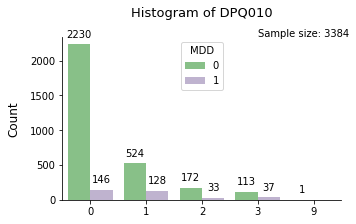

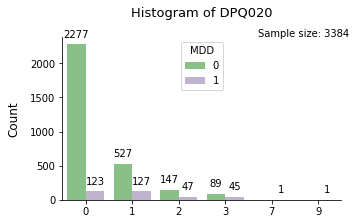

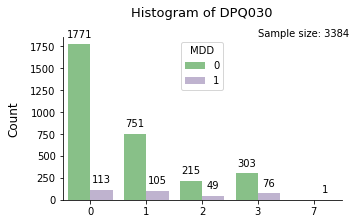

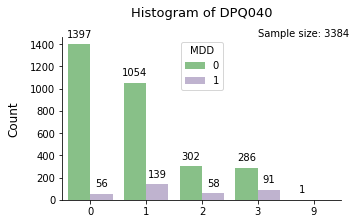

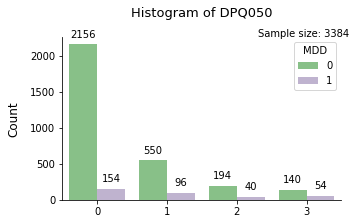

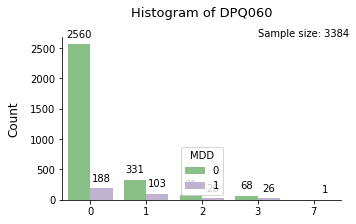

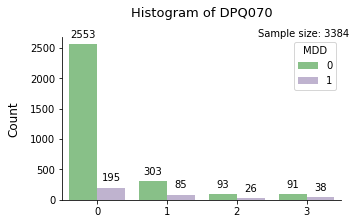

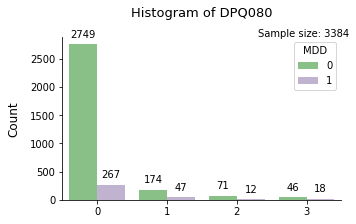

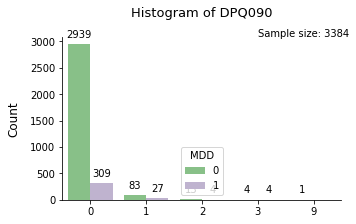

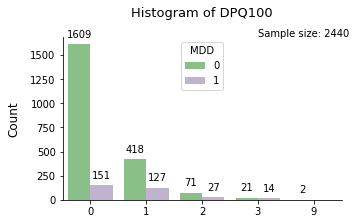

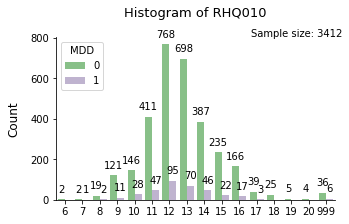

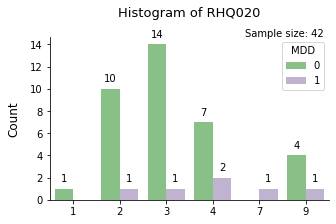

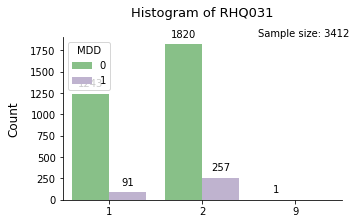

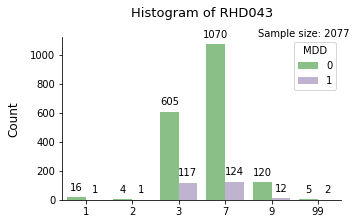

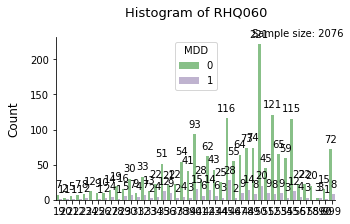

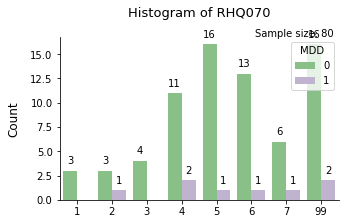

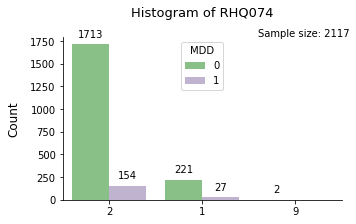

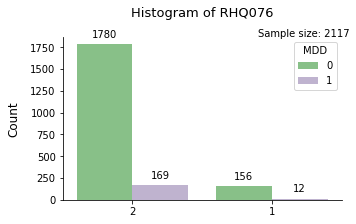

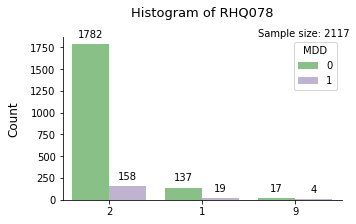

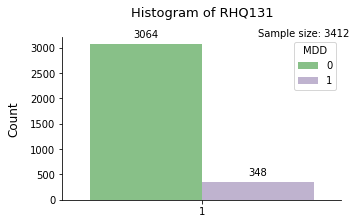

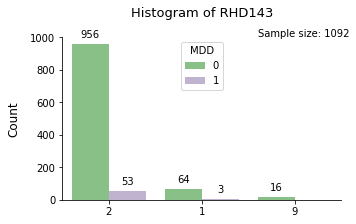

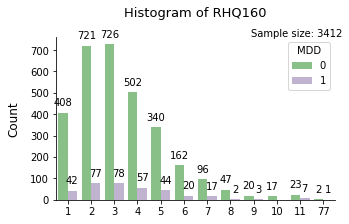

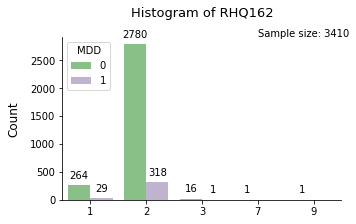

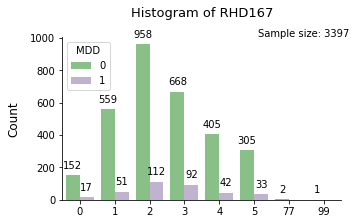

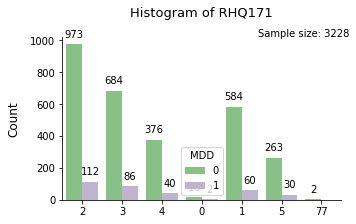

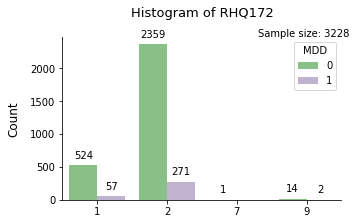

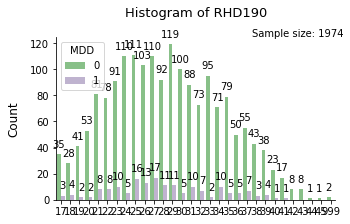

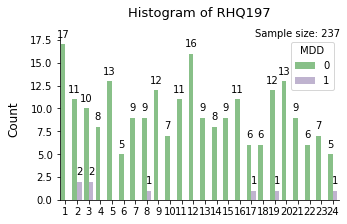

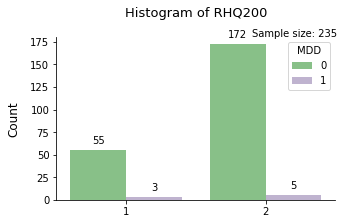

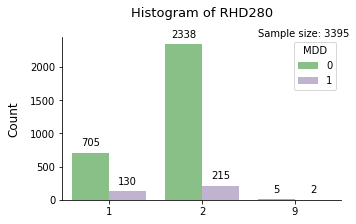

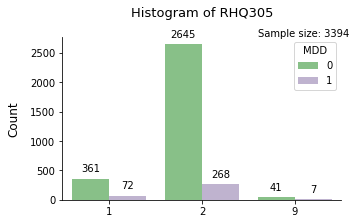

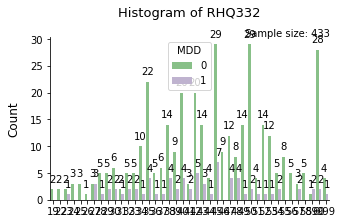

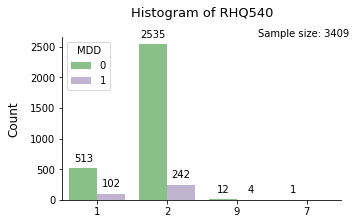

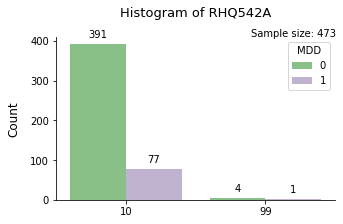

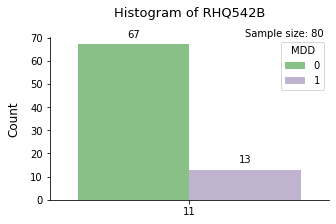

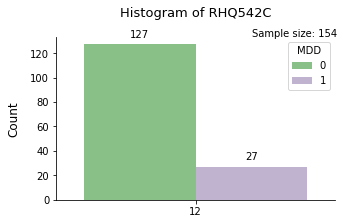

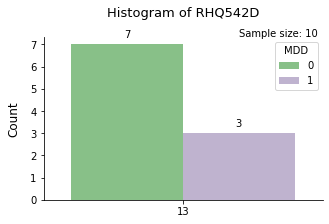

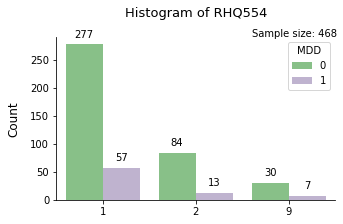

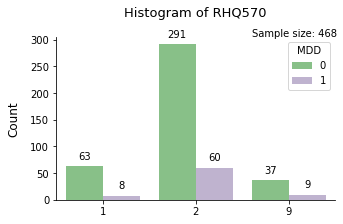

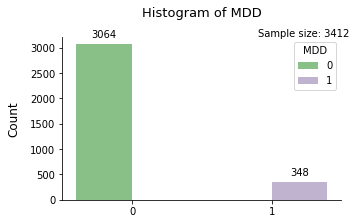

In [134]:
def create_histograms(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(5, 3))
        ax = sns.countplot(data=dataframe, x=column, palette = "Accent", hue="MDD")
        ax.set_xlabel('', fontsize=12, labelpad=10)
        ax.set_ylabel('Count', fontsize=12, labelpad=10)
        ax.set_title(f"Histogram of {column}", fontsize=13, pad=20)
        sns.despine()
        ax.set_xticklabels(ax.get_xticklabels())
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                        ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                        color='black')
        # Annotating the total sample count
        total_samples = dataframe[column].notnull().sum()
        plt.annotate(f"Sample size: {total_samples}", xy=(0.7, 1), xycoords='axes fraction')
        
        plt.show()
        
create_histograms(df)

# Correlation analysis

/Users/leej136/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 <a list of 33 Text yticklabel objects>)

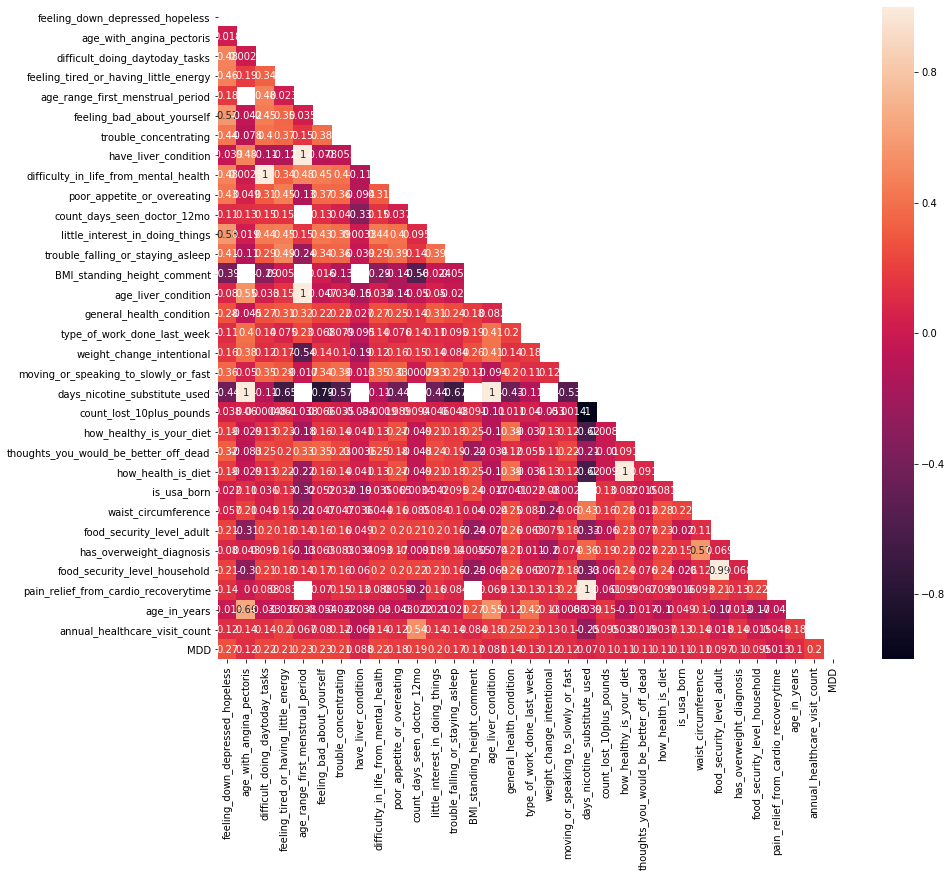

In [135]:
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]
df=preg

#convert to floats to enable correlation calculations
for col in df:
    df[col] = df[col].astype(float)


df_corr=df.corr(method='pearson')
corr_values=(df_corr['MDD']).sort_values(ascending=False)
df_corr_values=corr_values.to_frame()
filtered_corr = df_corr_values[df_corr_values['MDD'] > 0.1]
high_corr_feat = filtered_corr.index.tolist()
high_corr_feat
high_corr_feat=high_corr_feat[1:]
high_corr_descript = ['feeling_depressed_past_2_weeks',
                     'feeling_down_depressed_hopeless',
                     'age_with_angina_pectoris',
                     'difficult_doing_daytoday_tasks',
                     'feeling_tired_or_having_little_energy',
                     'feeling_tired_or_having_little_energy_past_2_weeks',
                     'feeling_bad_about_yourself_past_2_weeks',
                     'age_range_first_menstrual_period',
                     'feeling_bad_about_yourself',
                     'trouble_concentrating_past_2_weeks',
                     'trouble_concentrating',
                     'have_liver_condition',
                     'difficulty_in_life_from_mental_health',
                     'poor_appetite_or_overeating',
                     'poor_appetite_or_overeating_past_2_weeks',
                     'count_days_seen_doctor_12mo',
                     'little_interest_in_doing_things',
                     'little_interest_in_doing_things_past_2_weeks',
                     'trouble_falling_asleep_or_sleeping_too_much',
                     'trouble_falling_or_staying_asleep',
                     'BMI_standing_height_comment',
                     'age_liver_condition',
                     'general_health_condition',
                     'general_health_condition_2',
                     'type_of_work_done_last_week',
                     'weight_change_intentional',
                     'moving_or_speaking_to_slowly_or_fast',
                     'moving_or_speaking_to_slowly_or_fast_past_2_weeks',
                     'days_nicotine_substitute_used',
                     'count_lost_10plus_pounds',
                     'how_healthy_is_your_diet',
                     'thoughts_you_would_be_better_off_dead',
                     'how_health_is_diet',
                     'is_usa_born',
                     'waist_circumference',
                     'food_security_level_adult',
                     'food_security_level_adult_2',
                     'has_overweight_diagnosis',
                     'food_security_level_household',
                     'food_security_level_household_2',
                     'pain_relief_from_cardio_recoverytime',
                     'age_in_years',
                     'age_in_years_2',
                     'annual_healthcare_visit_count']

high_corr_dict = {high_corr_feat[i]: high_corr_descript[i] for i in range(len(high_corr_feat))}


#only select higher correlation features + rename columns
output_var = ["MDD"]
df = df[high_corr_feat+output_var]
df.rename(columns=high_corr_dict, inplace=True)

#drop duplicates
dup_col = ['feeling_depressed_past_2_weeks','feeling_tired_or_having_little_energy_past_2_weeks',
          'feeling_bad_about_yourself_past_2_weeks','trouble_concentrating_past_2_weeks',
          'poor_appetite_or_overeating_past_2_weeks','little_interest_in_doing_things_past_2_weeks',
          'trouble_falling_asleep_or_sleeping_too_much','general_health_condition_2',
          'moving_or_speaking_to_slowly_or_fast_past_2_weeks','food_security_level_adult_2',
          'food_security_level_household_2','age_in_years_2']

df=df.drop(dup_col, axis=1)

#heat map
df_corr=df.corr()
df_corr = df.astype('float64').corr(method='spearman')
f, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, mask = mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 

# Distribution plots of high correlation features

Converted columns  ['feeling_down_depressed_hopeless', 'age_with_angina_pectoris', 'difficult_doing_daytoday_tasks', 'feeling_tired_or_having_little_energy', 'age_range_first_menstrual_period', 'feeling_bad_about_yourself', 'trouble_concentrating', 'have_liver_condition', 'difficulty_in_life_from_mental_health', 'poor_appetite_or_overeating', 'count_days_seen_doctor_12mo', 'little_interest_in_doing_things', 'trouble_falling_or_staying_asleep', 'BMI_standing_height_comment', 'age_liver_condition', 'general_health_condition', 'type_of_work_done_last_week', 'weight_change_intentional', 'moving_or_speaking_to_slowly_or_fast', 'days_nicotine_substitute_used', 'count_lost_10plus_pounds', 'how_healthy_is_your_diet', 'thoughts_you_would_be_better_off_dead', 'how_health_is_diet', 'is_usa_born', 'waist_circumference', 'food_security_level_adult', 'has_overweight_diagnosis', 'food_security_level_household', 'pain_relief_from_cardio_recoverytime', 'age_in_years', 'annual_healthcare_visit_count', '

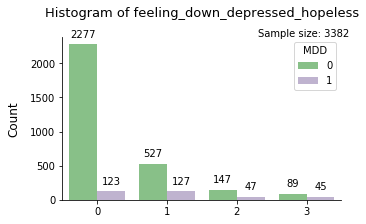

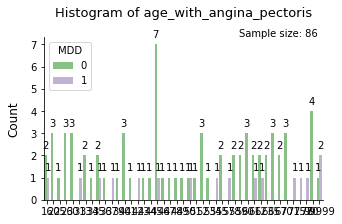

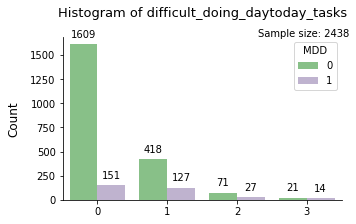

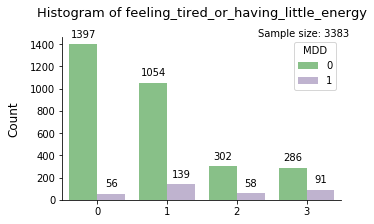

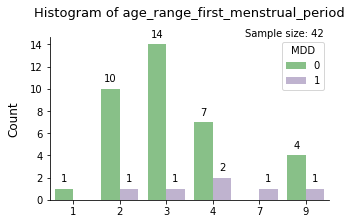

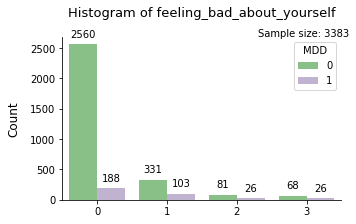

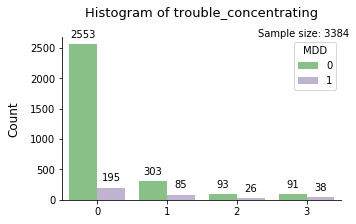

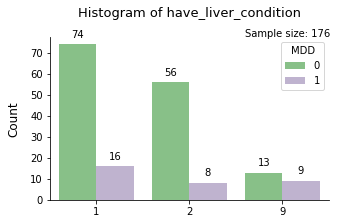

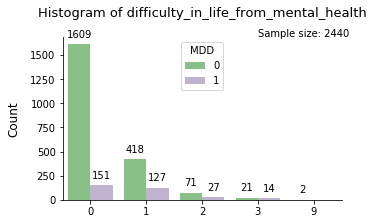

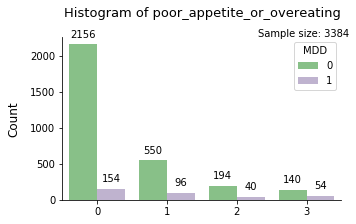

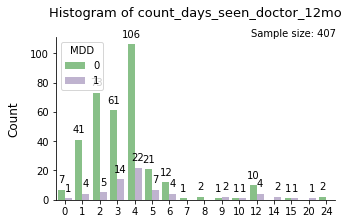

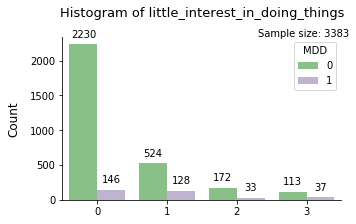

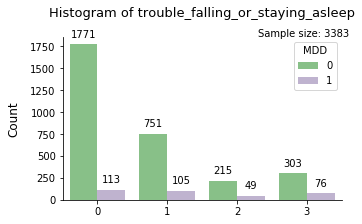

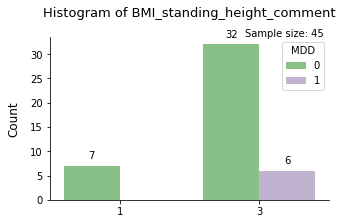

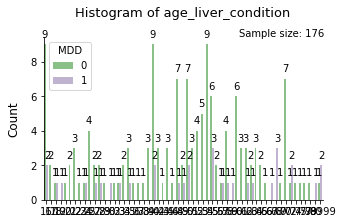

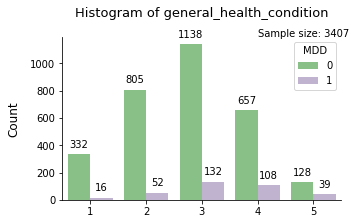

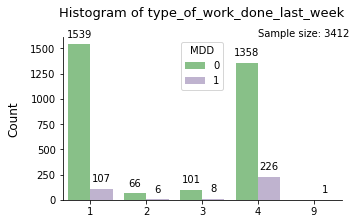

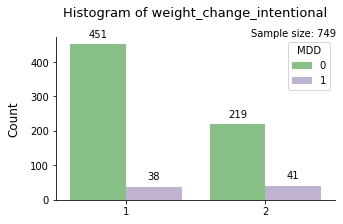

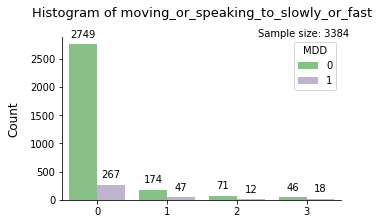

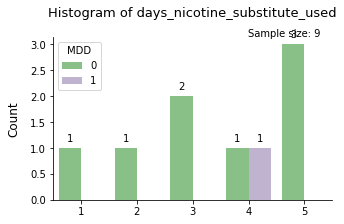

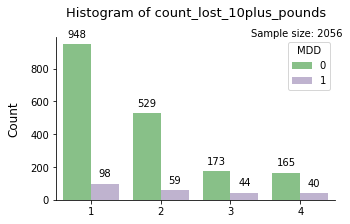

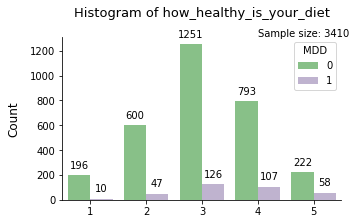

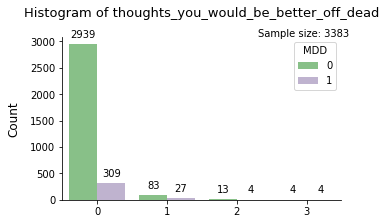

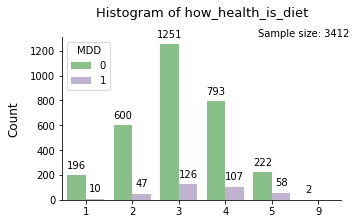

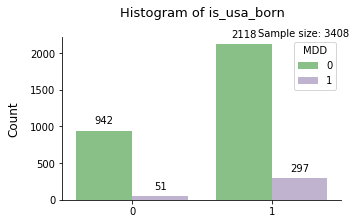

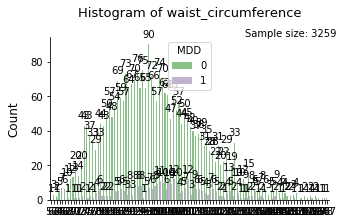

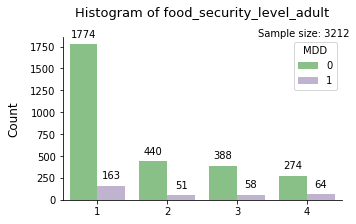

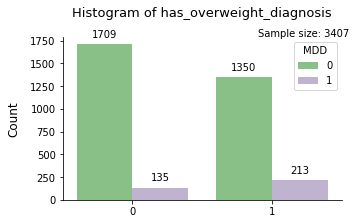

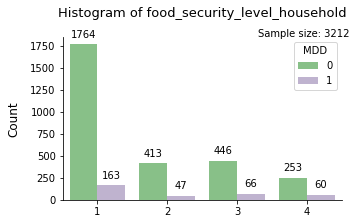

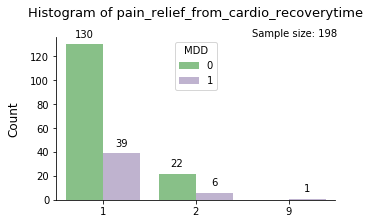

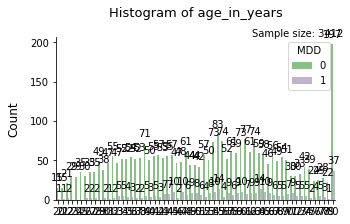

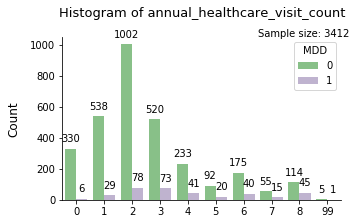

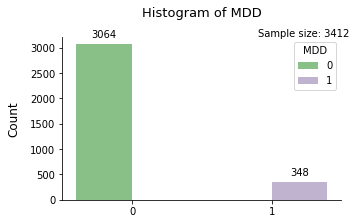

In [136]:
convert_to_int(df)
create_histograms(df)

# Distribution plots - ethics analysis

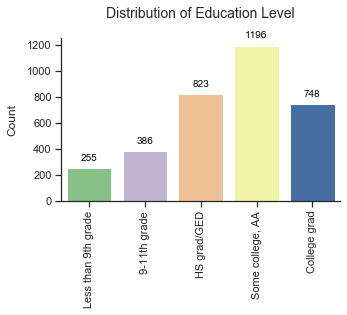

In [227]:
# filter for only people who have been pregnant
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]

df_clean = preg

#EDUCATION_LEVEL (DMDEDUC2SAS)
labels = {1: 'Less than 9th grade', 2: '9-11th grade', 3: 'HS grad/GED', 4: 'Some college, AA', 5: 'College grad'}
df_clean['education_level'] = df_clean['education_level'].map(labels)
order = ['Less than 9th grade','9-11th grade','HS grad/GED','Some college, AA','College grad']

# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='education_level', order=order, palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Education Level', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

In [231]:
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]
preg['MDD'].value_counts()

0    3064
1     348
Name: MDD, dtype: int64

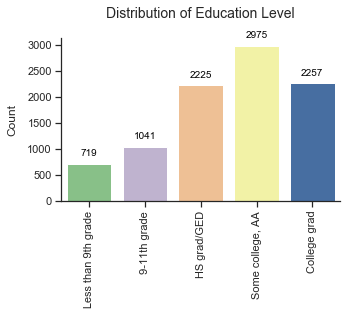

In [211]:
# All people (no filters)

#education_level, is_usa_born, monthly_povery_index, has_health_insurance, food_security_level_household,
#RIDRETH3 (race)

df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  


#EDUCATION_LEVEL (DMDEDUC2SAS)
labels = {1: 'Less than 9th grade', 2: '9-11th grade', 3: 'HS grad/GED', 4: 'Some college, AA', 5: 'College grad'}
df_clean['education_level'] = df_clean['education_level'].map(labels)
order = ['Less than 9th grade','9-11th grade','HS grad/GED','Some college, AA','College grad']

# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='education_level', order=order, palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Education Level', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

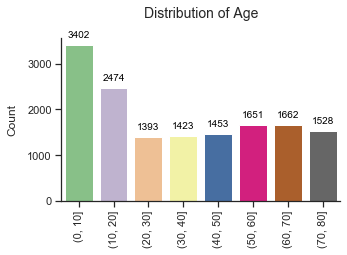

In [212]:
# All people (no filters), AGE_IN_YEARS
# sns.set(style='ticks', palette='viridis')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Bin the 'age_in_years' column
df_clean['age_bin'] = pd.cut(df_clean['age_in_years'], bins)

plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='age_bin', palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Age', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

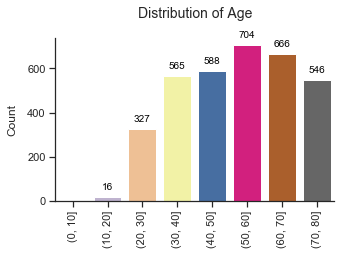

In [228]:
# filter for only people who have been pregnant
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]

df_clean = preg

#AGE_IN_YEARS
# sns.set(style='ticks', palette='viridis')

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
# Bin the 'age_in_years' column
df_clean['age_bin'] = pd.cut(df_clean['age_in_years'], bins)

plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='age_bin', palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Age', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

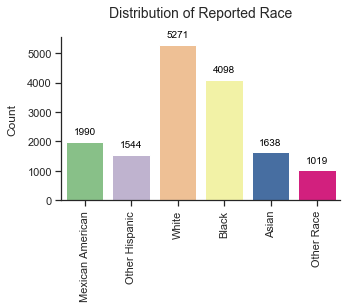

In [213]:
# All people (no filters), RIDRETH3 (race)
labels = {1: 'Mexican American', 2: 'Other Hispanic', 3: 'White', 4: 'Black', 6: 'Asian',7:'Other Race'}
df_clean['RIDRETH3'] = df_clean['RIDRETH3'].map(labels)
order = ['Mexican American','Other Hispanic','White','Black','Asian','Other Race']

# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='RIDRETH3', order = order,palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Reported Race', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

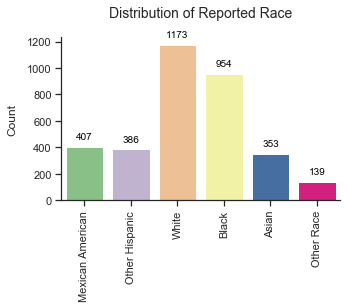

In [229]:
# filter for only people who have been pregnant
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]

df_clean = preg

#RIDRETH3 (race)
labels = {1: 'Mexican American', 2: 'Other Hispanic', 3: 'White', 4: 'Black', 6: 'Asian',7:'Other Race'}
df_clean['RIDRETH3'] = df_clean['RIDRETH3'].map(labels)
order = ['Mexican American','Other Hispanic','White','Black','Asian','Other Race']

# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='RIDRETH3', order = order,palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Reported Race', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

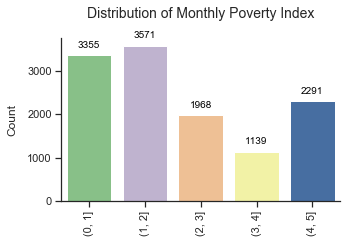

In [218]:
# All people (no filters), monthly_poverty_index

bins = [0, 1, 2, 3, 4, 5]
df_clean['poverty_bin'] = pd.cut(df_clean['monthly_poverty_index'], bins)
# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='poverty_bin',palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Monthly Poverty Index', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

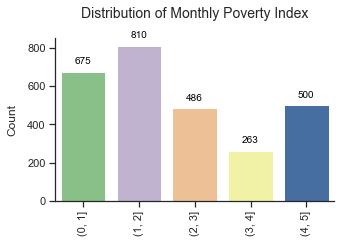

In [230]:
# filter for only people who have been pregnant
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
preg = df_clean[df_clean['has_been_pregnant']==1]

df_clean = preg

#monthly_poverty_index

bins = [0, 1, 2, 3, 4, 5]
df_clean['poverty_bin'] = pd.cut(df_clean['monthly_poverty_index'], bins)
# sns.set(style='ticks', palette='viridis')
plt.figure(figsize=(5, 3))
ax = sns.countplot(data=df_clean, x='poverty_bin',palette = "Accent")
ax.set_xlabel('', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Distribution of Monthly Poverty Index', fontsize=14, pad=20)
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10,\
                color='black')
plt.show()

In [165]:
test = pd.read_csv('/users/leej136/Downloads/df_cdc_clean.csv')  
test

,X,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170,RHQ010,RHD018_x,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHD167,RHQ171,RHQ172,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ305,RHQ332,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ570,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,OCD150,OCQ180,OCQ210,OCQ670,OCD383,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDYRUSZ,DMDEDUC2,DMDMARTZ,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690K,SMQ863,SMQ690F,SMQ830,SMDANY,SMAQUEX,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,DBQ930,DBQ935,DBQ940,DBQ945,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032H,HIQ032I,HIQ032J,HIQ260,HIQ105,HIQ270,HIQ210,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,PAQ706,FSDHH,FSDAD,FSD151,FSQ165,FSQ012,FSD230,FSD162,FSQ760,FSQ653,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD652ZW,FSD672ZW,FSD652CW,FSD660ZW,HUQ010,HUQ030,HUQ051,HUD062,HUQ071,HUQ090,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,INDFMMPI,INDFMMPC,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,RHD018_y,MCQ160A,MCQ195,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160P,MCQ160L,MCQ170L,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2,MDD,little_interest_in_doing_things,feeling_down_depressed_hopeless,trouble_falling_or_staying_asleep,feeling_tired_or_having_little_energy,poor_appetitie_or_overeating,feeling_bad_about_yourself,trouble_concentrating,moving_or_speaking_to_slowly_or_fast,thoughts_you_would_be_better_off_dead,difficult_doing_daytoday_tasks,alcoholic_drinks_past_12mo,how_healthy_is_your_diet,has_diabetes,count_days_seen_doctor_12mo,has_overweight_diagnosis,count_days_moderate_recreational_activity,count_minutes_moderate_recreational_activity,count_minutes_moderate_sedentary_activity,count_days_physical_activity_youth,has_tried_to_lose_weight_12mo,has_ate_less_to_lose_weight,has_exercised_to_lose_weight,count_lost_10plus_pounds,count_tried_to_lose_weight_youth,has_been_pregnant,food_security_level_household,food_security_level_adult,has_health_insurance,has_health_insurance_gap,general_health_condition,duration_last_healthcare_visit,monthly_poverty_index,monthly_poverty_index_category,count_hours_worked_last_w

In [205]:
df_clean['RIDRETH3'].value_counts()

Series([], Name: RIDRETH3, dtype: int64)

# Scratchwork

In [97]:
prescript_med['SEQN'].value_counts()

112542.0    22
121867.0    22
113001.0    20
120159.0    19
109578.0    19
            ..
119937.0     1
119965.0     1
123307.0     1
111384.0     1
114688.0     1
Name: SEQN, Length: 15560, dtype: int64

In [131]:
# Example of responder on 22 medications, only 1 row indicated for MDD
# Need to drop remaining rows

prescript_med[prescript_med['SEQN']==112542.0]

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,MDD
6942,112542.0,1.0,b'ALBUTEROL',b'd00749',1.0,2190.0,b'J45',b'',b'',Asthma,,,22.0,0
6943,112542.0,1.0,b'ALLOPURINOL',b'd00023',1.0,1460.0,b'I51.9',b'',b'',"Heart disease, unspecified",,,22.0,0
6944,112542.0,1.0,b'CITALOPRAM',b'd04332',1.0,730.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,22.0,1
6945,112542.0,1.0,b'COLCHICINE',b'd00150',1.0,1095.0,b'M1A',b'',b'',Chronic gout,,,22.0,0
6946,112542.0,1.0,b'DOCUSATE',b'd01021',1.0,2920.0,b'K58',b'',b'',Irritable bowel syndrome,,,22.0,0
6947,112542.0,1.0,b'FEXOFENADINE',b'd04040',1.0,1095.0,b'R09.81',b'T78.40',b'',Nasal congestion,"Allergy, unspecified",,22.0,0
6948,112542.0,1.0,b'FLUTICASONE NASAL',b'd04283',1.0,730.0,b'J45',b'R09.81',b'',Asthma,Nasal congestion,,22.0,0
6949,112542.0,1.0,b'FLUTICASONE; VILANTEROL',b'd08100',1.0,182.0,b'J44.9',b'J45',b'R06.9',"Chronic obstructive pulmonary disease, unspeci...",Asthma,Unspecified abnormalities of breathing,22.0,0
6950,112542.0,1.0,b'GABAPENTIN',b'd03182',1.0,182.0,b'M79.2',b'',b'',"Neuralgia and neuritis, unspecified",,,22.0,0
6951,112542.0,1.0,b'INSULIN DEGLUDEC',b'd08054',1.0,365.0,b'E11',b'',b'',Type 2 diabetes mellitus,,,22.0,0


In [147]:
prescript_med.sort_values(by=["SEQN"], axis = 0, ascending =[True], inplace=True)
prescript_med.sort_values(by=["MDD"], axis = 0, ascending =[False], inplace=True)
pm_dropped = prescript_med.drop_duplicates(subset = ['SEQN'], keep = 'first', inplace = False) 

In [150]:
pm_dropped[pm_dropped['SEQN']==121867.0]

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,MDD
26652,121867.0,1.0,b'METFORMIN',b'd03807',1.0,14600.0,b'E11',b'',b'',Type 2 diabetes mellitus,,,22.0,0


In [152]:
pm_dropped['MDD'].value_counts()

0    14844
1      716
Name: MDD, dtype: int64

In [111]:
prescript_med['RXDRSD1']=prescript_med['RXDRSD1'].apply(lambda x: x.decode())
prescript_med['RXDRSD2']=prescript_med['RXDRSD2'].apply(lambda x: x.decode())
prescript_med['RXDRSD3']=prescript_med['RXDRSD3'].apply(lambda x: x.decode())
dep=prescript_med.loc[prescript_med['RXDRSD1'].str.contains("depressive", case=False)]
dep2=prescript_med.loc[prescript_med['RXDRSD2'].str.contains("depressive", case=False)]
dep3=prescript_med.loc[prescript_med['RXDRSD3'].str.contains("depressive", case=False)]
print(dep['RXDRSD1'].value_counts())
print(dep2['RXDRSD2'].value_counts())
print(dep3['RXDRSD3'].value_counts())

Major depressive disorder, single episode, unspecified    792
Major depressive disorder, recurrent, unspecified          33
Name: RXDRSD1, dtype: int64
Major depressive disorder, single episode, unspecified    27
Major depressive disorder, recurrent, unspecified         11
Name: RXDRSD2, dtype: int64
Major depressive disorder, single episode, unspecified    3
Name: RXDRSD3, dtype: int64


In [126]:
conditions = [
    (prescript_med["RXDRSD1"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD1"] == "Major depressive disorder, recurrent, unspecified"),
    (prescript_med["RXDRSD2"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD2"] == "Major depressive disorder, recurrent, unspecified"),
    (prescript_med["RXDRSD3"] == "Major depressive disorder, single episode, unspecified"),
    (prescript_med["RXDRSD3"] == "Major depressive disorder, recurrent, unspecified")
    ]
values = [1,1,1,1,1,1]
prescript_med['MDD'] = np.select(conditions, values)
prescript_med.tail()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,MDD,MDD2
32957,124821.0,1.0,b'MELOXICAM',b'd04532',1.0,2555.0,b'M06.9',b'',b'',"Rheumatoid arthritis, unspecified",,,4.0,NaN,0
32958,124821.0,1.0,b'METOPROLOL',b'd00134',1.0,730.0,b'I21.P',b'',b'',Prevent heart attack/myocardial infarction,,,4.0,NaN,0
32959,124821.0,1.0,b'TAMSULOSIN',b'd04121',1.0,3650.0,b'N40',b'',b'',Enlarged prostate,,,4.0,NaN,0
32960,124822.0,1.0,b'ASPIRIN',b'd00170',2.0,1460.0,b'I21.P',b'I63.P',b'',Prevent heart attack/myocardial infarction,Prevent stroke,,2.0,NaN,0
32961,124822.0,1.0,b'ATORVASTATIN',b'd04105',1.0,1460.0,b'E78.0',b'',b'',Pure hypercholesterolemia,,,2.0,NaN,0


In [160]:
df_clean = pd.read_csv('/users/leej136/Downloads/df_cdc_joined_clean_pre.csv')  
df_clean

,Unnamed: 0,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,...,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2,MDD
0,0,109266.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,1,109271.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,30.0,20.0,NaN,NaN,1.0,NaN,NaN,1.0,0
2,2,109273.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,30.0,15.0,1.0,1.0,1.0,NaN,NaN,1.0,0
3,3,109274.0,1.0,4.000000e+00,2.0,5.000000e+00,7.0,5.397605e-79,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
4,4,109282.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,15555,121170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15556,15556,121709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15557,15557,122778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15558,15558,122879.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [122]:
prescript_med.iloc[[24369]]

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,MDD
24369,120747.0,1.0,b'LATANOPROST OPHTHALMIC',b'd04017',1.0,1460.0,b'H40',b'',b'',Glaucoma,,,8.0,NaN


In [71]:
ment_health = pd.read_sas("/users/leej136/Downloads/210/P_DPQ.XPT", format='xport')
ment_health

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,109266.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
1,109271.0,2.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79
2,109273.0,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
3,109274.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
4,109282.0,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e+00,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...
8960,124815.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
8961,124817.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
8962,124818.0,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
8963,124821.0,3.000000e+00,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [154]:
df = pd.merge(prescript_med, pm_dropped, on='SEQN', how='inner')
df

,SEQN,RXDUSE_x,RXDDRUG_x,RXDDRGID_x,RXQSEEN_x,RXDDAYS_x,RXDRSC1_x,RXDRSC2_x,RXDRSC3_x,RXDRSD1_x,...,RXQSEEN_y,RXDDAYS_y,RXDRSC1_y,RXDRSC2_y,RXDRSC3_y,RXDRSD1_y,RXDRSD2_y,RXDRSD3_y,RXDCOUNT_y,MDD_y
0,110007.0,1.0,b'CITALOPRAM',b'd04332',1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",...,1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,8.0,1
1,110007.0,1.0,b'SIMVASTATIN',b'd00746',1.0,1095.0,b'E78.0',b'',b'',Pure hypercholesterolemia,...,1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,8.0,1
2,110007.0,1.0,b'METFORMIN',b'd03807',1.0,2190.0,b'E11',b'',b'',Type 2 diabetes mellitus,...,1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,8.0,1
3,110007.0,1.0,b'LISINOPRIL',b'd00732',1.0,2190.0,b'I10',b'',b'',Essential (primary) hypertension,...,1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,8.0,1
4,110007.0,1.0,b'INSULIN LISPRO',b'd04373',1.0,2190.0,b'E11',b'',b'',Type 2 diabetes mellitus,...,1.0,3650.0,b'F32.9',b'',b'',"Major depressive disorder, single episode, uns...",,,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32957,114528.0,1.0,b'METFORMIN',b'd03807',1.0,730.0,b'E11',b'',b'',Type 2 diabetes mellitus,...,1.0,730.0,b'I10',b'',b'',Essential (primary) hypertension,,,3.0,0
32958,114528.0,1.0,b'ASPIRIN',b'd00170',1.0,730.0,b'I99.9',b'',b'',Unspecified disorder of circulatory system,...,1.0,730.0,b'I10',b'',b'',Essential (primary) hypertension,,,3.0,0
32959,114527.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',,...,NaN,NaN,b'',b'',b'',,,,NaN,0
32960,114525.0,1.0,b'ETHINYL ESTRADIOL; NORGESTIMATE',b'd03781',1.0,213.0,b'N94',b'',b'',Pain and other conditions associated with fema...,...,1.0,213.0,b'N94',b'',b'',Pain and other conditions associated with fema...,,,1.0,0
